Found 1980 images belonging to 2 classes.
Found 980 images belonging to 2 classes.


C:\Users\rajes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


C:\Users\rajes\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 99/100 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step - accuracy: 0.4920 - loss: 0.6963

C:\Program Files\WindowsApps\PythonSoftwareFoundation.Python.3.9_3.9.3568.0_x64__qbz5n2kfra8p0\lib\contextlib.py:137: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 27s 251ms/step - accuracy: 0.4921 - loss: 0.6963 - val_accuracy: 0.5612 - val_loss: 0.6892
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 234ms/step - accuracy: 0.5337 - loss: 0.6886 - val_accuracy: 0.5041 - val_loss: 0.6908
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 235ms/step - accuracy: 0.5626 - loss: 0.6754 - val_accuracy: 0.6214 - val_loss: 0.6534
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 234ms/step - accuracy: 0.5877 - loss: 0.6681 - val_accuracy: 0.5765 - val_loss: 0.6536
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 25s 243ms/step - accuracy: 0.5912 - loss: 0.6631 - val_accuracy: 0.6469 - val_loss: 0.6259
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 238ms/step - accuracy: 0.5992 - loss: 0.6552 - val_accuracy: 0.6561 - val_loss: 0.6163
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 236ms/step - accuracy: 0.6218 - loss: 0.6460 - val_accuracy: 0.6633 - val_loss: 0.6036
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 234ms/step - accuracy: 0.6431 - loss: 0.6330 - val

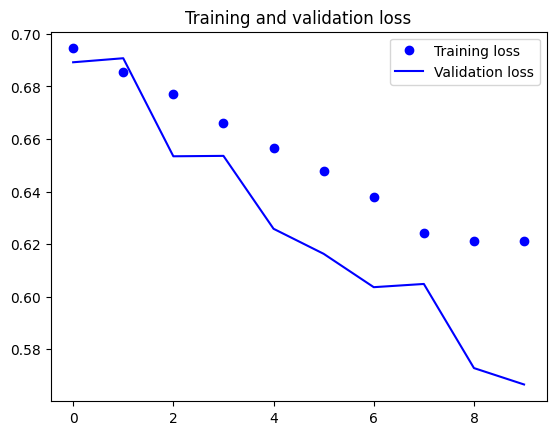

In [6]:
#Importing data generator lib
from tensorflow.keras.preprocessing.image import ImageDataGenerator


train_dir = r"C:\Users\rajes\Datascience_jp\Day20\Animals\train_data"
test_dir = r"C:\Users\rajes\Datascience_jp\Day20\Animals\test_data"

#Preprocessing with DataGenerator
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)

test_datagen   = ImageDataGenerator(rescale = 1./255)

train_datagenerator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

test_datagenerator = test_datagen.flow_from_directory(
    test_dir,
    target_size = (150,150),
    batch_size = 20,
    class_mode = 'binary'
)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten
from tensorflow.keras.optimizers import RMSprop
import matplotlib.pyplot as plt

#Building an Model
model = Sequential([
    Conv2D(32,(3,3),activation = 'relu', input_shape = (150,150,3)),
    MaxPooling2D(2,2),
    Conv2D(64,(3,3),activation = 'relu'),
    MaxPooling2D(2,2),
    Conv2D(128,(3,3),activation = 'relu'),
    MaxPooling2D(2,2),
    Conv2D(128,(3,3),activation = 'relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dropout(0.5),

    Dense(512, activation = 'relu'),
    Dense(1,activation    = 'sigmoid')
]
)

#Compile the model
model.compile(loss='binary_crossentropy',
              optimizer= RMSprop(learning_rate=1e-4),
              metrics=['accuracy']) 

#Fit the model 
history = model.fit(train_datagenerator, steps_per_epoch = 100, epochs = 10,
                    validation_data = test_datagenerator,validation_steps = 50)


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))


plt.figure()


plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
It's a dog!


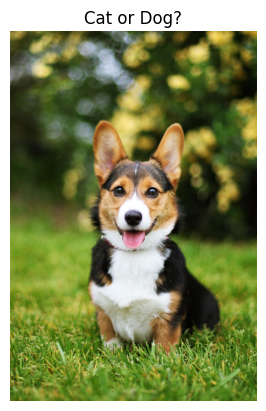

In [7]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Function to load and preprocess the image
def load_and_preprocess_image(img_path, target_size=(150, 150)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Rescale to match training conditions
    return img_array

# Path to the image you want to predict
img_path = r"C:\Users\rajes\Downloads\dog2.jpg"

# Load and preprocess the image
img_array = load_and_preprocess_image(img_path)

# Make a prediction
prediction = model.predict(img_array)

# Interpret the prediction
if prediction[0] > 0.5:
    print("It's a dog!")
else:
    print("It's a cat!")

# Optional: Display the image
img = image.load_img(img_path)
plt.imshow(img)
plt.title("Cat or Dog?")
plt.axis('off')
plt.show()
